In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
import statsmodels.stats.proportion as st_p
import statsmodels.stats as stts

In [3]:


BASE = "https://raw.githubusercontent.com/LaloMontealvo/project2-eda/main/data/raw/"

demo  = pd.read_csv(BASE + "df_final_demo.csv")
web1  = pd.read_csv(BASE + "df_final_web_data_pt_1.csv")
web2  = pd.read_csv(BASE + "df_final_web_data_pt_2.csv")
exper = pd.read_csv(BASE + "df_final_experiment_clients.csv")
web_complete = pd.concat([web1, web2], ignore_index=True)

print("demo:", demo.shape)
print("web_complete:", web_complete.shape)
print("exper:", exper.shape)

demo: (70609, 9)
web_complete: (755405, 5)
exper: (70609, 2)


In [4]:
from IPython.display import display

def profile(df, name):
    print(f"\n=== {name} ===")
    display(df.head(3))
    summary = (
        df.dtypes.to_frame('dtype')
          .assign(
              non_null=lambda _: df.notna().sum(),
              nulls=lambda _: df.isna().sum(),
              null_pct=lambda _: (df.isna().mean()*100).round(2),
              n_unique=lambda _: df.nunique(dropna=True)
          )
    )
    display(summary)

for name, df in [('demo', demo), ('web_complete', web_complete), ('exper', exper)]:
    profile(df, name)


=== demo ===


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


,dtype,non_null,nulls,null_pct,n_unique
client_id,int64,70609,0,0.00,70609
clnt_tenure_yr,float64,70595,14,0.02,54
clnt_tenure_mnth,float64,70595,14,0.02,482
clnt_age,float64,70594,15,0.02,165
gendr,object,70595,14,0.02,4
num_accts,float64,70595,14,0.02,8
bal,float64,70595,14,0.02,70328
calls_6_mnth,float64,70595,14,0.02,8
logons_6_mnth,float64,70595,14,0.02,9



=== web_complete ===


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


,dtype,non_null,nulls,null_pct,n_unique
client_id,int64,755405,0,0.0,120157
visitor_id,object,755405,0,0.0,130236
visit_id,object,755405,0,0.0,158095
process_step,object,755405,0,0.0,5
date_time,object,755405,0,0.0,629363



=== exper ===


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


,dtype,non_null,nulls,null_pct,n_unique
client_id,int64,70609,0,0.00,70609
Variation,object,50500,20109,28.48,2


In [5]:
exper

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [6]:
demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
web_complete = pd.concat([web1, web2], ignore_index=True)

web_complete

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [8]:
df_merged = pd.merge(web_complete, demo, on='client_id', how= 'left')
df_merged

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_merge = pd.merge(df_merged, exper, on='client_id', how='left')
df_merge

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_merge.isnull().sum()

client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr      305689
clnt_tenure_mnth    305689
clnt_age            305701
gendr               305689
num_accts           305689
bal                 305689
calls_6_mnth        305689
logons_6_mnth       305689
Variation           434096
dtype: int64

############################### KPIs & Cleaned DFs ##########################################

In [11]:
# CONTROL
# Slice the df_merge to obtain df_control_group with data from CONTROL GRP, based on 'Variation' column

df_control_grp = df_merge.sort_values(['Variation'])[:143462]

In [12]:
# Sorted df_control_group by= 'visit_id' and 'date_time'
# Create 'process_step_code' column in df_control_grp to replace 'process_step' values with mapp values 0-4

df_control_grp.sort_values(by=['visit_id', 'date_time'], inplace=True)
df_control_grp['process_step_code'] = df_control_grp['process_step'].replace({'start': 0,
                                                                              'step_1': 1,
                                                                              'step_2': 2,
                                                                              'step_3': 3,
                                                                              'confirm': 4})

C:\Users\Lalo\AppData\Local\Temp\ipykernel_13576\1882708952.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_control_grp['process_step_code'] = df_control_grp['process_step'].replace({'start': 0,


In [13]:
# Control with code
df_control_grp

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
239401,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,Control,0
27513,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0
27512,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0
27511,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,1
27510,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92500,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,0
92499,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,1
92498,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,2
92497,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,3


In [14]:
# TEST
# Slice the df_merge to obtain df_test_group with data from TEST GRP, based on 'Variation' column

df_test_grp = df_merge.sort_values(['Variation'])[143463:321309]



In [15]:
# Sorted df_test_group by= 'visit_id' and 'date_time'
# Create 'process_step_code' column in df_test_grp to replace 'process_step' values with mapp values 0-4

df_test_grp.sort_values(by=['visit_id', 'date_time'], inplace=True)
df_test_grp['process_step_code'] = df_test_grp['process_step'].replace({'start': 0,
                                                                              'step_1': 1,
                                                                              'step_2': 2,
                                                                              'step_3': 3,
                                                                              'confirm': 4})

C:\Users\Lalo\AppData\Local\Temp\ipykernel_13576\1369650991.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_grp['process_step_code'] = df_test_grp['process_step'].replace({'start': 0,


In [16]:
# TEST with code
df_test_grp

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,4
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,4
240562,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,0
240561,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,1
240560,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97222,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,0
97221,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,1
97220,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,2
97219,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,1


In [17]:
# Null 'Variation' Table --> All the clients with invalid tests (do not have a assigned test)

df_invalids = df_merge.sort_values(['Variation'])[321310:]
df_invalids

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
270,1208567,490822748_12476046982,63636232_1058424732_545130,start,2017-04-24 14:03:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9838496,408959474_91766774102,687233905_42314307889_453394,start,2017-03-24 21:26:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,2353261,387293592_26815377704,269923351_29360137819_823850,step_1,2017-03-20 16:07:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,2353261,387293592_26815377704,269923351_29360137819_823850,confirm,2017-03-20 16:05:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,2353261,387293592_26815377704,269923351_29360137819_823850,step_3,2017-03-20 16:04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Fill all the null values in the 'Variation' column with 'Invalid' -> goal is to evaluate the number of null test to assess the test conditions

df_invalids['Variation'] = df_invalids['Variation'].fillna('Invalid')
df_invalids

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
270,1208567,490822748_12476046982,63636232_1058424732_545130,start,2017-04-24 14:03:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
356,9838496,408959474_91766774102,687233905_42314307889_453394,start,2017-03-24 21:26:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
863,2353261,387293592_26815377704,269923351_29360137819_823850,step_1,2017-03-20 16:07:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
864,2353261,387293592_26815377704,269923351_29360137819_823850,confirm,2017-03-20 16:05:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
865,2353261,387293592_26815377704,269923351_29360137819_823850,step_3,2017-03-20 16:04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid


In [19]:
# Display the df after cleaning and slit by the 'Variation' column

display(df_control_grp), display(df_test_grp), display(df_invalids)


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
239401,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,Control,0
27513,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0
27512,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0
27511,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,1
27510,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92500,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,0
92499,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,1
92498,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,2
92497,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,3


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,4
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,4
240562,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,0
240561,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,1
240560,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97222,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,0
97221,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,1
97220,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,2
97219,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,1


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
270,1208567,490822748_12476046982,63636232_1058424732_545130,start,2017-04-24 14:03:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
356,9838496,408959474_91766774102,687233905_42314307889_453394,start,2017-03-24 21:26:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
863,2353261,387293592_26815377704,269923351_29360137819_823850,step_1,2017-03-20 16:07:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
864,2353261,387293592_26815377704,269923351_29360137819_823850,confirm,2017-03-20 16:05:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
865,2353261,387293592_26815377704,269923351_29360137819_823850,step_3,2017-03-20 16:04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Invalid


(None, None, None)

1 --> KPIs FROM CLIENTS DEMOGRAPHICS AND PRIMARY CLIENTS MEASURES

In [20]:
# Demographics for TEST GROUP

df_test_grp['clnt_age'].mean().round(1), df_test_grp['clnt_age'].mode()[0], df_test_grp['clnt_age'].median()   #55.6 YEARS -> avg between mean and mode

(np.float64(48.7), np.float64(62.5), 50.5)

In [21]:
# Most common gender in the TEST GROUP

common_gender = df_test_grp['gendr'].mode()[0]
common_gender

'M'

In [22]:
# Average tenure in years per client in TEST GROUP

avgtest_tenure_yr = df_test_grp['clnt_tenure_yr'].mean().round(2)
avgtest_tenure_yr

np.float64(12.18)

In [23]:
# Average nr of accounts per client in TEST GROUP

avgtest_acc_nr = df_test_grp['num_accts'].mean().round(2)
avgtest_acc_nr

np.float64(2.25)

In [24]:
# Calculate the average number of calls in the last 6 months

avgtest_calls = df_test_grp['calls_6_mnth'].mean().round(2)

# Calculate the average number of logons in the last 6 months

avgtest_logons = df_test_grp['logons_6_mnth'].mean().round(2)

avgtest_calls, avgtest_logons

(np.float64(3.21), np.float64(6.25))

In [ ]:
# Drop duplicates to retrieve the avg balance accross accounts per client in TEST GROUP

df_test_bal = df_test_grp.drop_duplicates(subset=['client_id'], keep='last')
df_test_bal.head()

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
352677,2478628,754122351_18568832435,100022086_87870757897_149620,confirm,2017-05-23 20:47:01,16.0,198.0,47.0,F,2.0,32456.28,2.0,5.0,Test,4
606497,9250886,507768762_35972844065,100253265_79786188559_15799,step_3,2017-06-04 18:53:12,7.0,92.0,55.0,U,2.0,84817.23,2.0,5.0,Test,3
217232,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:49:32,3.0,47.0,67.5,U,2.0,329512.81,3.0,6.0,Test,4
185538,8976740,417178847_68724546639,100293270_70949014562_696814,confirm,2017-04-18 14:17:20,16.0,199.0,32.5,F,2.0,46486.33,1.0,4.0,Test,4
21525,7760839,111195013_39389847324,10029965_1592382589_593999,step_1,2017-04-20 12:29:09,11.0,142.0,64.0,F,2.0,36454.02,1.0,4.0,Test,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37382,1498554,694433688_36658101552,999960019_60838685252_926860,start,2017-04-19 19:27:51,14.0,178.0,54.0,F,2.0,118550.94,3.0,6.0,Test,0
8578,2979920,830229399_73416253406,999971096_28827267783_236076,confirm,2017-04-13 10:34:08,11.0,138.0,28.5,F,2.0,83799.17,1.0,4.0,Test,4
213013,4449968,842902495_57580498240,999976049_95772503197_182554,confirm,2017-04-04 13:02:18,21.0,252.0,53.5,F,4.0,124701.46,2.0,5.0,Test,4
81690,829911,648229874_89449279372,999984454_18731538378_781808,confirm,2017-03-29 11:21:07,6.0,82.0,84.5,M,3.0,229828.31,6.0,9.0,Test,4


In [91]:
df_test_bal["bal"].sort_values(ascending= False).head(10)

58389     16320040.15
107619     8986419.77
202415     8137343.24
61136      8045102.60
228616     6353000.43
635602     6000386.82
445637     5754204.68
93732      5544842.49
126847     5439354.90
505177     5187970.13
Name: bal, dtype: float64

In [ ]:
df_test_bal.sor_

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
352677,2478628,754122351_18568832435,100022086_87870757897_149620,confirm,2017-05-23 20:47:01,16.0,198.0,47.0,F,2.0,32456.28,2.0,5.0,Test,4
606497,9250886,507768762_35972844065,100253265_79786188559_15799,step_3,2017-06-04 18:53:12,7.0,92.0,55.0,U,2.0,84817.23,2.0,5.0,Test,3
217232,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:49:32,3.0,47.0,67.5,U,2.0,329512.81,3.0,6.0,Test,4
185538,8976740,417178847_68724546639,100293270_70949014562_696814,confirm,2017-04-18 14:17:20,16.0,199.0,32.5,F,2.0,46486.33,1.0,4.0,Test,4
21525,7760839,111195013_39389847324,10029965_1592382589_593999,step_1,2017-04-20 12:29:09,11.0,142.0,64.0,F,2.0,36454.02,1.0,4.0,Test,1


In [26]:
# Average balance per client accounts 

df_test_bal['bal'].mean()

np.float64(148962.60503171248)

In [27]:
# Demographics for CONTROL GROUP

df_control_grp['clnt_age'].mean().round(1), df_control_grp['clnt_age'].mode()[0], df_control_grp['clnt_age'].median()  #53.25 YEARS -> avg between mean and mode

(np.float64(48.3), np.float64(58.5), 49.5)

In [28]:
# Most common gender in the CONTROL GROUP

common_gender = df_control_grp['gendr'].mode()[0]
common_gender

'U'

In [29]:
# Average tenure in years per client in CONTROL GROUP

avgcontrol_tenure_yr = df_control_grp['clnt_tenure_yr'].mean().round(2)
avgcontrol_tenure_yr

np.float64(12.17)

In [30]:
# Average nr of accounts per client in CONTROL GROUP

avgcontrol_acc_nr = df_control_grp['num_accts'].mean().round(2)
avgcontrol_acc_nr

np.float64(2.27)

In [31]:
# Calculate the average number of calls in the last 6 months

avgcontrol_calls = df_control_grp['calls_6_mnth'].mean().round(2)

# Calculate the average number of logons in the last 6 months

avgcontrol_logons = df_control_grp['logons_6_mnth'].mean().round(2)

avgcontrol_calls, avgcontrol_logons

(np.float64(3.28), np.float64(6.31))

In [32]:
df_control_grp['client_id'].nunique()

23532

In [33]:
# Drop duplicates to retrieve the avg balance accross accounts per client in CONTROL GROUP

df_control_bal = df_control_grp.drop_duplicates(subset=['client_id'], keep='last')
df_control_bal

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code
239401,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,Control,0
1607,4823947,611052344_43146965242,100057941_88477660212_944512,step_3,2017-04-09 11:34:24,7.0,86.0,52.0,U,2.0,47340.11,5.0,8.0,Control,3
242543,3479519,194422203_56127484794,10006594_66157970412_679648,confirm,2017-04-13 11:56:12,12.0,150.0,52.5,F,2.0,349316.66,2.0,5.0,Control,4
209991,3432704,118095622_91258648673,100071743_53464757454_616703,start,2017-04-07 10:50:20,21.0,252.0,60.0,M,2.0,27970.87,1.0,4.0,Control,0
601839,5477656,164180384_39691984082,10007589_47780784567_391490,confirm,2017-05-18 08:03:33,10.0,122.0,54.0,M,2.0,24706.77,1.0,4.0,Control,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139807,7462323,847563410_72648439715,999859408_41720215615_938916,confirm,2017-04-05 13:39:45,7.0,94.0,53.5,U,2.0,210560.30,2.0,5.0,Control,4
144160,7031731,675674236_56499394876,999890184_77121766521_746360,start,2017-04-19 11:28:29,5.0,69.0,32.0,U,2.0,34973.20,6.0,9.0,Control,0
228567,8035493,219846414_94112504392,999936732_27995195904_324897,step_1,2017-04-13 05:44:03,23.0,277.0,76.0,U,2.0,414251.20,6.0,9.0,Control,1
130634,9512888,735113752_39198257069,999951892_54774917180_163890,start,2017-04-07 11:21:01,13.0,166.0,39.0,M,2.0,45730.25,2.0,5.0,Control,0


In [34]:
df_control_bal['bal'].mean()

np.float64(150147.32665958258)

########################## COMPLETION RATES ###################################

In [35]:
# Completion Rate for the CONTROL GRP --> 12.20% (36,77%)

df_control_grp['process_step'].value_counts()

process_step
start      47608
step_1     29668
step_2     25886
step_3     22795
confirm    17505
Name: count, dtype: int64

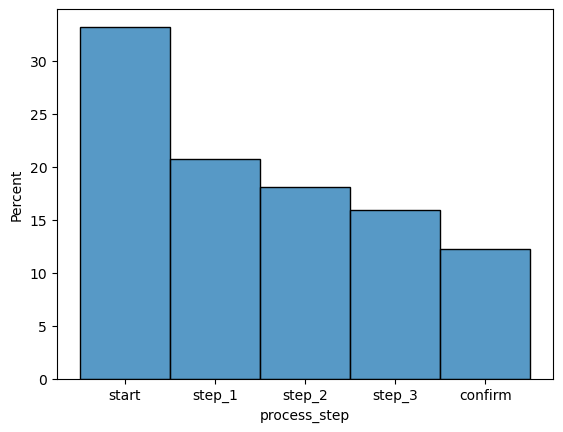

In [36]:
sns.histplot(df_control_grp['process_step'], stat='percent')
plt.show()

In [37]:
# Completion Rate for the TEST GRP --> 14.46% (45,55%)

df_test_grp['process_step'].value_counts()

process_step
start      56473
step_1     38768
step_2     30989
step_3     25894
confirm    25722
Name: count, dtype: int64

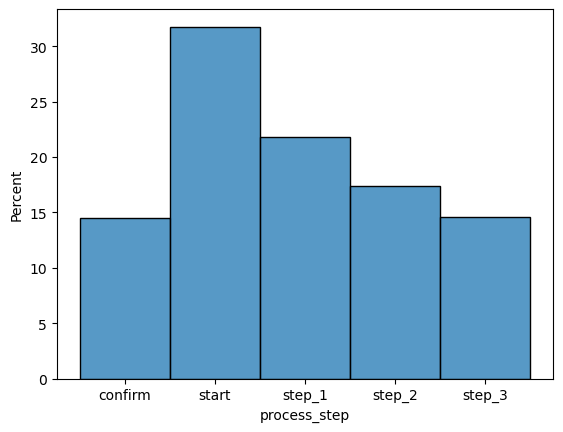

In [92]:
sns.histplot(df_test_grp['process_step'], stat='percent')
plt.show()

################# ERROR RATE ###############

In [86]:

# CONTROL

# consecutive differences between rows; .diff() method applied to encoded column --> goal: find error\ client visit

df_control_grp["step_diff"] = df_control_grp.groupby(["client_id", "visit_id"])[["process_step_code"]].diff()


In [85]:
df_control_grp

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code,step_diff,bol_diff
239401,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,Control,0,NaN,False
27513,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0,NaN,False
27512,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0,0.0,False
27511,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,1,1.0,False
27510,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0,-1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92500,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,0,NaN,False
92499,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,1,1.0,False
92498,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,2,1.0,False
92497,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,6.0,75.0,64.5,U,2.0,74783.76,5.0,8.0,Control,3,1.0,False


In [40]:
# Transform the differences between steps into a boolean values

df_control_grp['bol_diff'] = df_control_grp['step_diff'] < 0

In [41]:
#Slicing into a df with most important columns to confirm data

df_control_grp[['client_id', 'visit_id', 'process_step', 'Variation', 'bol_diff']]

,client_id,visit_id,process_step,Variation,bol_diff
239401,105007,100030127_47967100085_936361,start,Control,False
27513,5623007,100037962_47432393712_705583,start,Control,False
27512,5623007,100037962_47432393712_705583,start,Control,False
27511,5623007,100037962_47432393712_705583,step_1,Control,False
27510,5623007,100037962_47432393712_705583,start,Control,True
...,...,...,...,...,...
92500,4064969,999985675_64610694964_443659,start,Control,False
92499,4064969,999985675_64610694964_443659,step_1,Control,False
92498,4064969,999985675_64610694964_443659,step_2,Control,False
92497,4064969,999985675_64610694964_443659,step_3,Control,False


In [42]:
# assign variable with the boolean diff table

df_bol_diffcontrol = df_control_grp.groupby(['visit_id', 'Variation'])['bol_diff'].max().reset_index()

In [43]:
# Group by to order the data and retrieve the min() by each 'visit_id'; .reset_index() method to return df to original form

df_error_control = df_control_grp.groupby("visit_id")["step_diff"].min().reset_index()

In [44]:
df_error_control

,visit_id,step_diff
0,100030127_47967100085_936361,NaN
1,100037962_47432393712_705583,-1.0
2,100057941_88477660212_944512,-2.0
3,10006594_66157970412_679648,0.0
4,100071743_53464757454_616703,NaN
...,...,...
32184,999859408_41720215615_938916,0.0
32185,999890184_77121766521_746360,-2.0
32186,999936732_27995195904_324897,1.0
32187,999951892_54774917180_163890,NaN


In [45]:
# Error Rating Calculation - CONTROL GRP
# Assign sliced df to a variable to use in rate calculation

df_error_diffcontrol = df_error_control[df_error_control["step_diff"] < 0]

In [46]:
df_error_diffcontrol

,visit_id,step_diff
1,100037962_47432393712_705583,-1.0
2,100057941_88477660212_944512,-2.0
8,100195539_90558871716_822894,-1.0
14,10045388_98429038488_557266,-1.0
16,100481857_71511233596_788753,-1.0
...,...,...
32165,999312081_2788701508_538170,-1.0
32169,999399984_77869472518_48297,-4.0
32171,999433914_18701060972_619485,-1.0
32175,999528108_94761236019_731649,-2.0


In [47]:
# Use .shape function to retrieve a usable tupple with the total rows and columns
# Use rows for rate calculation ---> access position [0]

df_error_diffcontrol.shape

(6531, 2)

In [48]:
# Rate error from the CONTROL GRP table --> 20.29%
# (represents: total_amount of errors/ total_amount of visit_id)

error_rate_control = (df_error_diffcontrol.shape[0]/df_error_control.shape[0])*100
error_rate_control

20.28953990493647

In [49]:
# TEST

# consecutive differences between rows; .diff() method applied to encoded column --> goal: find error\ client visit

df_test_grp["step_diff"] = df_test_grp.groupby(["client_id", "visit_id"])[["process_step_code"]].diff()


In [50]:
# Group by to order the data and retrieve the min() by each 'visit_id'; .reset_index() method to return df to original form

df_error_test = df_test_grp.groupby("visit_id")["step_diff"].min().reset_index()

In [51]:
# Create boolean values column to isolate 'confirm' step

df_test_grp['bol_diff'] = df_test_grp['step_diff'] < 0

In [52]:
# Sliced df_test jsut to have relevant columns

df_test_grp[['client_id', 'visit_id', 'process_step', 'Variation', 'bol_diff']]

,client_id,visit_id,process_step,Variation,bol_diff
108614,3561384,100012776_37918976071_457913,confirm,Test,False
108613,3561384,100012776_37918976071_457913,confirm,Test,False
240562,7338123,100019538_17884295066_43909,start,Test,False
240561,7338123,100019538_17884295066_43909,step_1,Test,False
240560,7338123,100019538_17884295066_43909,step_2,Test,False
...,...,...,...,...,...
97222,6627522,999988789_76411676596_272843,start,Test,False
97221,6627522,999988789_76411676596_272843,step_1,Test,False
97220,6627522,999988789_76411676596_272843,step_2,Test,False
97219,6627522,999988789_76411676596_272843,step_1,Test,True


In [53]:
# Group by the visit_id and the Variation in order to find the confirm step rate

df_bol_difftest = df_test_grp.groupby(['visit_id', 'Variation'])['bol_diff'].max().reset_index()

In [54]:
df_error_test

,visit_id,step_diff
0,100012776_37918976071_457913,0.0
1,100019538_17884295066_43909,-1.0
2,100022086_87870757897_149620,1.0
3,100173292_91322748906_143563,1.0
4,100217156_67053490690_383412,-2.0
...,...,...
37131,999960019_60838685252_926860,-2.0
37132,999971096_28827267783_236076,0.0
37133,999976049_95772503197_182554,0.0
37134,999984454_18731538378_781808,1.0


In [55]:
# Slice into error code

df_error_difftest = df_error_test[df_error_test["step_diff"] < 0]

In [56]:
df_error_difftest

,visit_id,step_diff
1,100019538_17884295066_43909,-1.0
4,100217156_67053490690_383412,-2.0
7,100258507_71262593004_214494,-1.0
11,100393582_40120493420_784218,-1.0
16,10056419_61656665964_803695,-1.0
...,...,...
37119,999745626_63135446754_695326,-3.0
37120,999759701_27012733172_594750,-1.0
37125,999890686_31377985689_29808,-2.0
37131,999960019_60838685252_926860,-2.0


In [57]:
# Error Rate from the TEST GRP table --> 26.84%
# (represents: total_amount of errors/ total_amount of visit_id)
###########################################################################################
error_rate_test = (df_error_difftest.shape[0]/df_error_test.shape[0])*100
error_rate_test

26.836492890995263

In [58]:
## ERROR RATE PER VARIATION
# concat df test and df control and ignore index --> to create crosstab for Chi-square

df_total_error = pd.concat([df_bol_diffcontrol, df_bol_difftest], ignore_index=True)

In [59]:
# Create crosstab between 'Variation' and Errors to access dependency

crosstab_errors = pd.crosstab(df_total_error['Variation'], df_total_error['bol_diff'])

In [60]:
# Evaluate the dependency of the 2 variables per each 'Variation' value

crosstab_errors

bol_diff,False,True
Variation,,
Control,25658,6531
Test,27170,9966


In [61]:
# run the test to access p-value for relation.
#     Hypothesis:
# H0: error rate is independent from Variation
# H1: error rate is Dependent from Variation

st.chi2_contingency(crosstab_errors)

Chi2ContingencyResult(statistic=np.float64(407.208648258456), pvalue=np.float64(1.4850362601431865e-90), dof=1, expected_freq=array([[24529.10915254,  7659.89084746],
       [28298.89084746,  8837.10915254]]))

In [62]:
## Z-TEST FOR ERRORS --< TREAT AS EXAMPLE

# H0: p errors control = p errors test
# H1: p errors control != p errors test

#st_p.proportions_ztest([6531, 9966], [32000, 36000], value=None, alternative='two-sided')

#################  TIME PER EACH STEP #########################

In [63]:
# CONTROL GRP

# Changing data type to date

df_control_grp['date_time'] = pd.to_datetime(df_control_grp['date_time'])

# Sort DataFrame by client_id, visit_id, and date_time

df_control_sorted = df_control_grp.sort_values(['client_id', 'visit_id', 'date_time'])

# Calculate time difference between consecutive steps for each visit

df_control_sorted['duration'] = df_control_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Remove the 'start' step since it has no duration, because is the first step of the process

df_control_duration = df_control_sorted.dropna(subset=['duration'])


df_control_duration

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code,step_diff,bol_diff,duration
132375,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,1,1.0,False,0 days 00:00:49
132374,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,1,0.0,False,0 days 00:01:03
132373,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,2,1.0,False,0 days 00:00:09
132372,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,3,1.0,False,0 days 00:04:35
132371,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,1,-2.0,True,0 days 00:01:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119536,9998346,292425655_16607136645,189177304_69869411700_783154,step_2,2017-03-29 15:30:11,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,2,1.0,False,0 days 00:00:16
119535,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,3,1.0,False,0 days 00:00:14
119532,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,3,0.0,False,0 days 00:07:03
119533,9998346,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,4,1.0,False,0 days 00:00:00


In [64]:
# TEST GRP

# Changing data type to date

df_test_grp['date_time'] = pd.to_datetime(df_test_grp['date_time'])

# Sort DataFrame by client_id, visit_id, and date_time

df_test_sorted = df_test_grp.sort_values(['client_id', 'visit_id', 'date_time'])

# Calculate time difference between consecutive steps for each visit

df_test_sorted['duration'] = df_test_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Remove the 'start' step since it has no duration, because is the first step of the process

df_test_duration = df_test_sorted.dropna(subset=['duration'])


df_test_duration

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code,step_diff,bol_diff,duration
72017,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,1,1.0,False,0 days 00:00:07
72016,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,2,1.0,False,0 days 00:00:32
72015,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,3,1.0,False,0 days 00:01:39
72014,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,4,1.0,False,0 days 00:00:20
138181,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,1,1.0,False,0 days 00:00:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471738,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,2,1.0,False,0 days 00:00:10
471737,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,3,1.0,False,0 days 00:00:39
471736,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,4,1.0,False,0 days 00:00:21
107094,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,1,1.0,False,0 days 00:00:15


######### TESTS FOR HYPOTHESIS -- 1PART

In [65]:
## Completion RATE PER VARIATION --> reaching step_4 with or without errors

# concat df test and df control and ignore index --> to create crosstab for Chi-square

df_completion = pd.concat([df_control_grp, df_test_grp], ignore_index=True)

In [66]:
df_completion['bool_rates'] = df_completion['process_step_code'] == 4

In [67]:
# Concated table between 'control' df and 'test' df

df_completion

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,process_step_code,step_diff,bol_diff,bool_rates
0,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,9.0,118.0,35.0,F,2.0,34897.47,3.0,6.0,Control,0,NaN,False,False
1,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0,NaN,False,False
2,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0,0.0,False,False
3,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,1,1.0,False,False
4,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,16.0,202.0,78.0,M,2.0,146827.14,5.0,8.0,Control,0,-1.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321303,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,0,NaN,False,False
321304,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,1,1.0,False,False
321305,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,2,1.0,False,False
321306,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,1,-1.0,True,False


In [68]:
df_completion[['client_id', 'visit_id', 'process_step_code', 'Variation', 'bool_rates']]

,client_id,visit_id,process_step_code,Variation,bool_rates
0,105007,100030127_47967100085_936361,0,Control,False
1,5623007,100037962_47432393712_705583,0,Control,False
2,5623007,100037962_47432393712_705583,0,Control,False
3,5623007,100037962_47432393712_705583,1,Control,False
4,5623007,100037962_47432393712_705583,0,Control,False
...,...,...,...,...,...
321303,6627522,999988789_76411676596_272843,0,Test,False
321304,6627522,999988789_76411676596_272843,1,Test,False
321305,6627522,999988789_76411676596_272843,2,Test,False
321306,6627522,999988789_76411676596_272843,1,Test,False


In [69]:
df_completion_rates = df_completion.groupby(['visit_id', 'Variation', 'process_step_code'])['bool_rates'].max().reset_index()

In [70]:
df_completion_rates

,visit_id,Variation,process_step_code,bool_rates
0,100012776_37918976071_457913,Test,4,True
1,100019538_17884295066_43909,Test,0,False
2,100019538_17884295066_43909,Test,1,False
3,100019538_17884295066_43909,Test,2,False
4,100019538_17884295066_43909,Test,3,False
...,...,...,...,...
238799,999985675_64610694964_443659,Control,3,False
238800,999985675_64610694964_443659,Control,4,True
238801,999988789_76411676596_272843,Test,0,False
238802,999988789_76411676596_272843,Test,1,False


In [71]:
df_comp_rate = df_completion_rates[df_completion_rates["bool_rates"] > 0]

In [72]:
# DF with completion numbers after boolean mask

df_comp_rate

,visit_id,Variation,process_step_code,bool_rates
0,100012776_37918976071_457913,Test,4,True
5,100019538_17884295066_43909,Test,4,True
10,100022086_87870757897_149620,Test,4,True
22,10006594_66157970412_679648,Control,4,True
28,10007589_47780784567_391490,Control,4,True
...,...,...,...,...
238777,999958344_67534252886_39917,Test,4,True
238785,999971096_28827267783_236076,Test,4,True
238790,999976049_95772503197_182554,Test,4,True
238795,999984454_18731538378_781808,Test,4,True


In [73]:
# Evaluate the dependency of the 2 variable 'Variation' and completion rate - 'confirm' step rate

crosstab_completion = pd.crosstab(df_completion['Variation'], df_completion['bool_rates'])

In [74]:
crosstab_completion

bool_rates,False,True
Variation,,
Control,125957,17505
Test,152124,25722


In [75]:
# H0: completion rate is Independent from Variation
# H1: completion rate is Dependent from Variation

st.chi2_contingency(crosstab_completion)

Chi2ContingencyResult(statistic=np.float64(348.5190465688938), pvalue=np.float64(8.905127090088943e-78), dof=1, expected_freq=array([[124161.41652869,  19300.58347131],
       [153919.58347131,  23926.41652869]]))

############## AVERAGE TIME PER STEP ###################

In [76]:
#df_bol_difftest = df_test_grp.groupby(['visit_id', 'Variation'])['bol_diff'].max().reset_index()

# df_completion = pd.concat([df_control_grp, df_test_grp], ignore_index=True)

In [77]:
df_control_duration, df_test_duration

(        client_id             visitor_id                      visit_id  \
 132375       1028   42237450_62128060588  557292053_87239438319_391157   
 132374       1028   42237450_62128060588  557292053_87239438319_391157   
 132373       1028   42237450_62128060588  557292053_87239438319_391157   
 132372       1028   42237450_62128060588  557292053_87239438319_391157   
 132371       1028   42237450_62128060588  557292053_87239438319_391157   
 ...           ...                    ...                           ...   
 119536    9998346  292425655_16607136645  189177304_69869411700_783154   
 119535    9998346  292425655_16607136645  189177304_69869411700_783154   
 119532    9998346  292425655_16607136645  189177304_69869411700_783154   
 119533    9998346  292425655_16607136645  189177304_69869411700_783154   
 119534    9998346  292425655_16607136645  189177304_69869411700_783154   
 
        process_step           date_time  clnt_tenure_yr  clnt_tenure_mnth  \
 132375       step_1

In [78]:
df_avgcontrol = df_control_duration.groupby(['Variation', 'process_step'])['duration'].mean().reset_index()

In [79]:
df_avgtest = df_test_duration.groupby(['Variation', 'process_step'])['duration'].mean().reset_index()

In [80]:
df_avgcontrol

,Variation,process_step,duration
0,Control,confirm,0 days 00:02:08.525536108
1,Control,start,0 days 00:02:31.366025986
2,Control,step_1,0 days 00:00:42.973351938
3,Control,step_2,0 days 00:00:38.677557038
4,Control,step_3,0 days 00:01:33.069180443


In [81]:
df_avgduration = pd.concat([df_avgcontrol, df_avgtest], ignore_index=True)

In [82]:
df_avgduration

,Variation,process_step,duration
0,Control,confirm,0 days 00:02:08.525536108
1,Control,start,0 days 00:02:31.366025986
2,Control,step_1,0 days 00:00:42.973351938
3,Control,step_2,0 days 00:00:38.677557038
4,Control,step_3,0 days 00:01:33.069180443
5,Test,confirm,0 days 00:02:08.751656815
6,Test,start,0 days 00:02:27.146609156
7,Test,step_1,0 days 00:00:37.710585175
8,Test,step_2,0 days 00:00:48.083100785
9,Test,step_3,0 days 00:01:36.915671583


In [83]:
# H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)
# H1 => µ1 ≠ µ2 (population mean of dataset1 is different from dataset2)

st.ttest_ind(a=df_avgtest['duration'], b=df_avgcontrol['duration'], alternative='two-sided')

ValueError: data type <class 'numpy.timedelta64'> not inexact

In [ ]:
# H0 => µ1 =< µ2 (population mean of dataset1 is lesser or equal to dataset2)
# H1 => µ1 > µ2 (population mean of dataset1 is greater from dataset2)


st.ttest_ind(a=df_avgtest['duration'], b=df_avgcontrol['duration'], alternative='greater')

In [ ]:
# H0 => µ1 >= µ2 (population mean of dataset1 is greater or equal to dataset2)
# HA => µ1 < µ2 (population mean of dataset1 is less than from dataset2)

st.ttest_ind(a=df_avgtest['duration'], b=df_avgcontrol['duration'], alternative='less')

In [ ]:
#df_avg_confirm = df_avgduration[df_avgduration["process_step"] == 'confirm']

####################################################################

    FOR HERE BELOW THE KPIs ARE FROM THE GENERAL TABLE --> JUST FOR CONSULT

In [ ]:
df_test_grp['clnt_age'].mean().round(1), 
df_test_grp['clnt_age'].mode()[0], 
df_test_grp['clnt_age'].median()   #55.6 YEARS

In [ ]:
df_control_grp['clnt_age'].mean().round(1), 
df_control_grp['clnt_age'].mode()[0], 
df_control_grp['clnt_age'].median() #53.25 YEARS

In [ ]:
# Retrieve null count per column --> goal: clean the null values before KPI calculations

df_merge.isnull().sum()

In [ ]:
# Drop null values from num_accts; clients without account information would not fit KPI calculations
# clnt_age null values can be filled with the mode of ages

#df_dropped = df_merge.dropna(subset=['num_accts'], thresh=1)
#df_dropped

In [ ]:
# Calculate average client age and mode, to analyze against general client list -> goal: find primary clients

avg_clnt_age = df_dropped['clnt_age'].mean().round(1), df_dropped['clnt_age'].mode()[0]

In [ ]:
# Calcualte yearly tenure for clients, analyze long term relation with company; longer tenure means longer years; above average is primary client -> goal: find primary clients

avg_tenure_yr = df_dropped['clnt_tenure_yr'].mean().round(0)
avg_tenure_yr


In [ ]:
# Gender and Account KPIs

common_gender = df_dropped['gendr'].mode()[0]
common_gender

In [ ]:
# Average account per client

avg_acc_nr = df_dropped['num_accts'].mean().round(1)
avg_acc_nr

In [ ]:
# Calculate the average number of calls in the last 6 months

avg_calls = df_dropped['calls_6_mnth'].mean().round(1)

# Calculate the average number of logons in the last 6 months

avg_logons = df_dropped['logons_6_mnth'].mean().round(1)

avg_calls, avg_logons

In [ ]:
# Primary clients --> Profile:

df_dropped

# After analyzing the df we conclude that:
#       
#   Primary clients are older --> Average age of 48 years old
#   Long-standing clients --> Average tenure of 12 years 

In [ ]:
# Completion Rate (process_step) --> 'Confirm' step; how many reach it; proportion (.value_counts('column_name' or normalize=True) -> returns proportion)

df_dropped['process_step'].value_counts(normalize=True).round(2)

In [ ]:

df_dropped['Variation'].value_counts()

In [ ]:
# Convert the 'date_time' column to datetime

df_dropped['date_time'] = pd.to_datetime(df_dropped['date_time'])


print(df_dropped['date_time'].dtype)

In [ ]:
## FUNCTION TO APPLY KPI CALCULATIONS TO BOTH TABLE ###

# Sort DataFrame by client_id, visit_id, and date_time

df_dropped_sorted = df_dropped.sort_values(['client_id', 'visit_id', 'date_time'])


# Calculate time difference between consecutive steps for each visit

df_dropped_sorted['duration'] = df_dropped_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff()


# Remove the 'start' step since it has no duration, because is the first step of the process

df_duration = df_dropped_sorted.dropna(subset=['duration'])


df_duration[['client_id', 'visit_id', 'process_step', 'date_time', 'duration', 'Variation']]

In [ ]:
# H0: p errors control = p errors test
# H1: p errors control != p errors test

st_p.proportions_ztest([6531, 9966], [32000, 36000], value=None, alternative='two-sided')